In [14]:
import skimage.color
import numpy as np
import matplotlib.pyplot as plt
import imageio
import time
import cv2
import glob
import os

filename = 'BCS_aligned_sorted'
filenames_total = glob.glob(filename+'\\*\\*\\*')
filenames_depth = []
for image in filenames_total:
    if image.endswith('_D.tif'):
        filenames_depth.append(image)

filenames_color = []
for image in filenames_total:
    if image.endswith('_C.tif'):
        filenames_color.append(image)
#print(filenames)


for cow_dir in glob.glob(filename+'*\\*\\'):
    try:
        os.mkdir(cow_dir.replace('BCS_aligned_sorted', 'BCS_sorted_resized'))
    except:
        pass
for cow_dir in glob.glob(filename+'*\\*\\*\\'):
    try:
        os.mkdir(cow_dir.replace('BCS_aligned_sorted', 'BCS_sorted_resized'))
    except:
        pass


for image_name in filenames_depth:
    if image_name.endswith('_D.tif'):
        img = imageio.imread(image_name)
        if np.shape(img)[1] == 640:
            imageio.imwrite(str(image_name).replace('BCS_aligned_sorted', 'BCS_sorted_resized'), img, 'TIFF')
        if np.shape(img)[1] == 848:
            new_img = img[:, 104:-104]
            imageio.imwrite(str(image_name).replace('BCS_aligned_sorted', 'BCS_sorted_resized'), new_img, 'TIFF')

for image_name in filenames_color:
    if image_name.endswith('_C.tif'):
        img = imageio.imread(image_name)
        img_HSI = skimage.color.rgb2hsv(img)
        imageio.imwrite(str(image_name).replace('BCS_aligned_sorted', 'BCS_sorted_resized'), img_HSI, 'TIFF')

        

    

# temp_max_vec = [0, 0, 0, 0, 0, 0]
# temp_max = 0
# for img_name in filenames:
#     if img_name.endswith('_D.tif'):
#         temp_max = np.max(imageio.imread(img_name))
#     if (temp_max >= temp_max_vec[0]) and (temp_max < 10000):
#         temp_max_vec[5] = temp_max_vec[4]
#         temp_max_vec[4] = temp_max_vec[3]
#         temp_max_vec[3] = temp_max_vec[2]
#         temp_max_vec[2] = temp_max_vec[1]
#         temp_max_vec[1] = temp_max_vec[0]
#         temp_max_vec[0] = temp_max

# print(temp_max_vec)

(480, 640, 3)


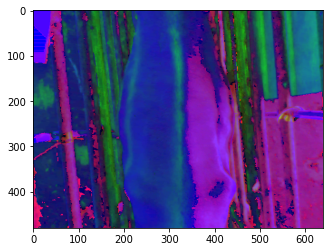

In [13]:
img = imageio.imread(str(filenames_total[0]).replace('BCS_sorted', 'BCS_sorted_resized'))

plt.figure()
plt.imshow(img)
print(np.shape(img))

9823
BCS_sorted\2\Cow_11\100_D.tif
['BCS_sorted\\2\\Cow_11\\', 'BCS_sorted\\2\\Cow_11_2\\', 'BCS_sorted\\2\\Cow_46\\', 'BCS_sorted\\2\\Cow_46_1\\', 'BCS_sorted\\2\\Cow_46_2\\', 'BCS_sorted\\2\\Cow_5\\', 'BCS_sorted\\2\\Cow_5_1\\', 'BCS_sorted\\3\\Cow_1\\', 'BCS_sorted\\3\\Cow_12\\', 'BCS_sorted\\3\\Cow_14\\', 'BCS_sorted\\3\\Cow_16_1\\', 'BCS_sorted\\3\\Cow_16_2\\', 'BCS_sorted\\3\\Cow_22_1_other_camera_says_23\\', 'BCS_sorted\\3\\Cow_26\\', 'BCS_sorted\\3\\Cow_4\\', 'BCS_sorted\\3\\Cow_42\\', 'BCS_sorted\\3\\Cow_47_1\\', 'BCS_sorted\\3\\Cow_48\\', 'BCS_sorted\\3\\Cow_4_1\\', 'BCS_sorted\\3\\Cow_53\\', 'BCS_sorted\\4\\Cow_10_1\\', 'BCS_sorted\\4\\Cow_13_1\\', 'BCS_sorted\\4\\Cow_15\\', 'BCS_sorted\\4\\Cow_17_maybe_16\\', 'BCS_sorted\\4\\Cow_19\\', 'BCS_sorted\\4\\Cow_2\\', 'BCS_sorted\\4\\Cow_20\\', 'BCS_sorted\\4\\Cow_21\\', 'BCS_sorted\\4\\Cow_23_1\\', 'BCS_sorted\\4\\Cow_24\\', 'BCS_sorted\\4\\Cow_27\\', 'BCS_sorted\\4\\Cow_27_1\\', 'BCS_sorted\\4\\Cow_29\\', 'BCS_sorted\\4\\Cow_30\

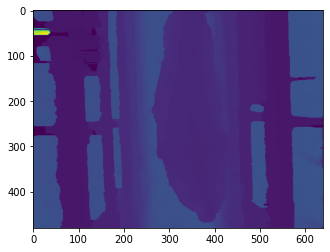

In [ ]:
img = imageio.imread(filenames_total[4001])

plt.imshow(img)
print(np.max(img))
print(filenames_total[1])

print(glob.glob(filename+'*\\*\\*\\'))